# 股價

In [1]:
import requests
import json
import numpy as np
import pandas as pd
import time
from pytrends.request import TrendReq
from pprint import pprint

stock_df = ''
time_array = ''
from datetime import datetime
def get_stock(stock,year_start,month_start,date_start,year_end,month_end,date_end,select):
    global stock_df, time_array
    URL = "https://query1.finance.yahoo.com/v8/finance/chart/"
    time_array = []
    period1 = str(int(datetime(year_start, month_start, date_start).timestamp())+43200)
    period2 = str(int(datetime(year_end, month_end, date_end).timestamp()))
    response = requests.get(URL+stock+'?period1='+period1+"&period2="+period2+"&interval=1d&events=history&=hP2rOschxO0")
    data = json.loads(response.text)
    timestamp = np.array(data['chart']['result'][0]['timestamp'])
    for i in timestamp:
        struct_time = time.localtime(i)
        timeString = time.strftime("%Y-%m-%d", struct_time)
        np.array(time_array.append(timeString))
    stock_df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=time_array)
    
#     return stock_df
    return stock_df[select].plot(figsize=(12,5))

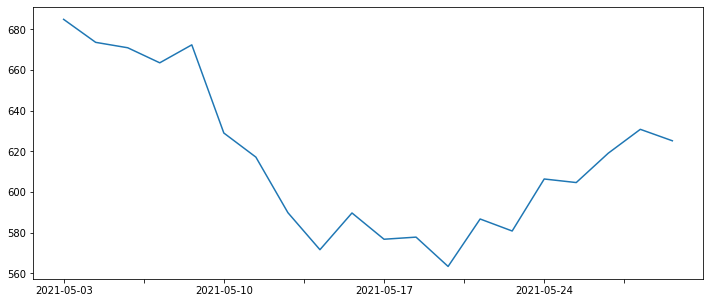

In [3]:
stock='TSLA'
select = 'close'
get_stock(stock,2021,5,1,2021,6,1,select) #使用者選擇股票、期間及類別

In [4]:
stock_df

,open,close,high,volume,low
2021-05-03,703.799988,684.900024,706.000000,27043100,680.500000
2021-05-04,678.940002,673.599976,683.450012,29739300,657.700012
2021-05-05,681.059998,670.940002,685.299988,21901900,667.340027
2021-05-06,680.760010,663.539978,681.020020,27784600,650.000000
2021-05-07,665.799988,672.369995,690.000000,23469200,660.219971
2021-05-10,664.900024,629.039978,665.049988,31392400,627.609985
2021-05-11,599.239990,617.200012,627.099976,46503900,595.599976
2021-05-12,602.489990,589.890015,620.409973,33823600,586.770020
2021-05-13,601.539978,571.690002,606.460022,44184900,559.650024
2021-05-14,583.409973,589.739990,592.869995,33370900,570.460022


In [148]:
mood_array = []
for i in stock_df.index:
    mood_df_filter = mood[mood.index==i]
    mood_array.append(mood_df_filter['mood'])
mood_array

[date
 2021-03-01    1.333333
 Name: mood, dtype: float64,
 date
 2021-03-02    1.666667
 Name: mood, dtype: float64,
 date
 2021-03-03    0.8
 Name: mood, dtype: float64,
 date
 2021-03-04    0.666667
 Name: mood, dtype: float64,
 date
 2021-03-05    0.5
 Name: mood, dtype: float64,
 date
 2021-03-08    2.5
 Name: mood, dtype: float64,
 date
 2021-03-09    1.25
 Name: mood, dtype: float64,
 date
 2021-03-10    0.857143
 Name: mood, dtype: float64,
 date
 2021-03-11    1.125
 Name: mood, dtype: float64,
 date
 2021-03-12    7.0
 Name: mood, dtype: float64,
 date
 2021-03-15    1.0
 Name: mood, dtype: float64,
 date
 2021-03-16    4.0
 Name: mood, dtype: float64,
 date
 2021-03-17    1.25
 Name: mood, dtype: float64,
 date
 2021-03-18    1.4
 Name: mood, dtype: float64,
 date
 2021-03-19    1.5
 Name: mood, dtype: float64,
 date
 2021-03-22    4.0
 Name: mood, dtype: float64,
 date
 2021-03-23    0.833333
 Name: mood, dtype: float64,
 date
 2021-03-24    1.285714
 Name: mood, dtype: flo

In [25]:
stock_df = ''
time_array = ''
def test(stock,year_start,month_start,date_start,year_end,month_end,date_end,select):
    global stock_df, time_array
    URL = "https://query1.finance.yahoo.com/v8/finance/chart/"
    time_array = []
    period1 = str(int(datetime(year_start, month_start, date_start).timestamp()))
    period2 = str(int(datetime(year_end, month_end, date_end).timestamp()))
    response = requests.get(URL+stock+'?period1='+period1+"&period2="+period2+"&interval=1d&events=history&=hP2rOschxO0")
    data = json.loads(response.text)
    timestamp = np.array(data['chart']['result'][0]['timestamp'])-43200
    for i in timestamp:
        struct_time = time.localtime(i)
        timeString = time.strftime("%Y-%m-%d", struct_time)
        np.array(time_array.append(timeString))
    stock_df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=time_array)
    
    data1 = mood_array
    data2 = stock_df['close']
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('date')
    ax1.set_ylabel('sentiment', color=color)
    ax1.plot(data1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  

    color = 'tab:blue'
    ax2.set_ylabel('stock', color=color)  
    ax2.plot(data2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.xticks([0,7,14,22],rotation=50)
    fig.tight_layout()
    pic_test = plt.show()
    return pic_test

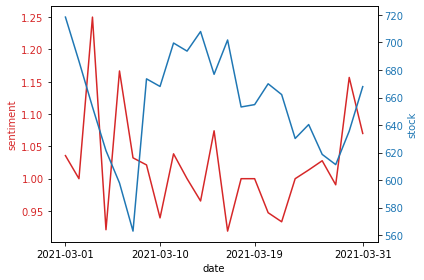

In [26]:
import matplotlib.pyplot as plt
stock='tsla'
select = 'close'
test(stock,2021,3,1,2021,4,1,select)

In [52]:
import matplotlib.pyplot as plt
data1 = mood_array
data2 = stock_df['close']
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('sentiment', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('stock', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.xticks([0,(len(data2.index)-1)*0.25,(len(data2.index)-1)*0.5,(len(data2.index)-1)*0.75,len(data2.index)-1],rotation=50)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(axis='both')
plt.show()

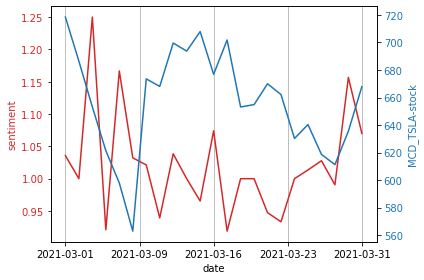

In [39]:
import matplotlib.pyplot as plt
data1 = mood_array
data2 = stock_df['close']
fig, ax1 = plt.subplots()
plt.grid(axis='x')
color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('sentiment', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('MCD_TSLA-stock', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.xticks([0,(len(data2.index)-1)*0.25,(len(data2.index)-1)*0.5,(len(data2.index)-1)*0.75,len(data2.index)-1])
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# plt.show()

In [34]:
len(stock_df['close'])

44

In [31]:
%matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ln, = ax.plot(range(5))
ln.set_color('orange')
plt.grid()
plt.ioff()

Using matplotlib backend: Qt5Agg


In [215]:
mood_array_score = []
for i in mood_array:
    mood_array_score.append(i[0])
mood_array

[date
 2021-03-01    1.333333
 Name: mood, dtype: float64,
 date
 2021-03-02    1.666667
 Name: mood, dtype: float64,
 date
 2021-03-03    0.8
 Name: mood, dtype: float64,
 date
 2021-03-04    0.666667
 Name: mood, dtype: float64,
 date
 2021-03-05    0.5
 Name: mood, dtype: float64,
 date
 2021-03-08    2.5
 Name: mood, dtype: float64,
 date
 2021-03-09    1.25
 Name: mood, dtype: float64,
 date
 2021-03-10    0.857143
 Name: mood, dtype: float64,
 date
 2021-03-11    1.125
 Name: mood, dtype: float64,
 date
 2021-03-12    7.0
 Name: mood, dtype: float64,
 date
 2021-03-15    1.0
 Name: mood, dtype: float64,
 date
 2021-03-16    4.0
 Name: mood, dtype: float64,
 date
 2021-03-17    1.25
 Name: mood, dtype: float64,
 date
 2021-03-18    1.4
 Name: mood, dtype: float64,
 date
 2021-03-19    1.5
 Name: mood, dtype: float64,
 date
 2021-03-22    4.0
 Name: mood, dtype: float64,
 date
 2021-03-23    0.833333
 Name: mood, dtype: float64,
 date
 2021-03-24    1.285714
 Name: mood, dtype: flo

In [214]:
stock_df_with_score = stock_df
stock_df_with_score['score']=mood_array_score
stock_df_with_score.corr()

,close,volume,low,high,open,score
close,1.000000,-0.428518,0.868099,0.866201,0.660763,0.244149
volume,-0.428518,1.000000,-0.667582,-0.337786,-0.416922,-0.178116
low,0.868099,-0.667582,1.000000,0.898901,0.872618,0.316555
high,0.866201,-0.337786,0.898901,1.000000,0.878227,0.257325
open,0.660763,-0.416922,0.872618,0.878227,1.000000,0.214822
score,0.244149,-0.178116,0.316555,0.257325,0.214822,1.000000


In [246]:
stock_df_with_score.corr()

,close,volume,low,high,open,score
close,1.000000,-0.428518,0.868099,0.866201,0.660763,0.536245
volume,-0.428518,1.000000,-0.667582,-0.337786,-0.416922,-0.178695
low,0.868099,-0.667582,1.000000,0.898901,0.872618,0.404224
high,0.866201,-0.337786,0.898901,1.000000,0.878227,0.434166
open,0.660763,-0.416922,0.872618,0.878227,1.000000,0.261216
score,0.536245,-0.178695,0.404224,0.434166,0.261216,1.000000


In [245]:
stock_df_with_score = stock_df
stock_df_with_score['score']=mood_array_score
stock_df_with_score['score'] = stock_df_with_score['score'].shift()
stock_df_with_score

,close,volume,low,high,open,score
2021-03-01,718.429993,27136200,685.049988,719.000000,690.109985,NaN
2021-03-02,686.440002,23732200,685.000000,721.109985,718.280029,1.333333
2021-03-03,653.200012,30208000,651.710022,700.700012,687.989990,1.666667
2021-03-04,621.440002,65919500,600.000000,668.450012,655.799988,0.800000
2021-03-05,597.950012,89396500,539.489990,627.840027,626.059998,0.666667
2021-03-08,563.000000,51787000,558.789978,620.130005,600.549988,0.500000
2021-03-09,673.580017,67523300,595.210022,678.090027,608.179993,2.500000
2021-03-10,668.059998,60605700,655.059998,717.849976,700.299988,1.250000
2021-03-11,699.599976,36253900,677.179993,702.500000,699.400024,0.857143
2021-03-12,693.729980,33583800,666.140015,694.880005,670.000000,1.125000


## 串接Google Sheet

In [16]:
pip install pygsheets

Note: you may need to restart the kernel to use updated packages.


In [73]:
!pip3 install gspread
!pip3 install --upgrade google-api-python-client oauth2client 

  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.0.4
    Uninstalling google-auth-httplib2-0.0.4:
      Successfully uninstalled google-auth-httplib2-0.0.4
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.8
    Uninstalling google-api-python-client-1.12.8:
      Successfully uninstalled google-api-python-client-1.12.8


In [6]:
import gspread
import pandas as pd
from oauth2client.service_account import ServiceAccountCredentials

In [7]:
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('nanshan-t4.json', scope)
client = gspread.authorize(creds)

In [8]:
# get the instance of the Spreadsheet
sheet = client.open('mood')

# get the first sheet of the Spreadsheet
sheet_instance = sheet.get_worksheet(0)
records_data = sheet_instance.get_all_records()

mood = pd.DataFrame(records_data)

In [9]:
mood.index= pd.to_datetime(mood['date'])

In [40]:
mood

,date,AAPL,TSLA,MSFT,AMZN,GOOG,AAPL_sub,TSLA_sub,MSFT_sub,AMZN_sub,GOOG_sub
date,,,,,,,,,,,
2021-03-01,2021/3/1,1.000000,1.035714,1.062500,1.000000,0.987179,0.000000,1.792857,2.335714,1.578571,3.063094
2021-03-02,2021/3/2,0.904762,1.000000,1.235294,0.959184,0.942857,0.611111,1.608333,1.366666,1.858333,1.726190
2021-03-03,2021/3/3,0.875000,1.250000,1.074074,1.000000,0.967742,2.441666,1.185714,1.515909,1.214881,1.701984
2021-03-04,2021/3/4,0.800000,0.921053,1.058824,0.870968,1.000000,1.184524,1.401190,0.992857,1.836111,1.851190
2021-03-05,2021/3/5,0.960000,1.166667,1.125000,1.375000,1.285714,0.678968,0.166667,0.166667,1.209523,1.166666
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27,2021/5/27,0.750000,0.969697,1.000000,1.272727,1.000000,0.500000,3.302380,0.291667,0.452381,0.000000
2021-05-28,2021/5/28,1.333333,1.250000,1.000000,1.000000,1.333333,0.250000,0.166667,0.000000,0.277778,0.142857
2021-05-29,2021/5/29,1.333333,0.666667,1.300000,1.000000,1.000000,0.125000,0.200000,0.959524,0.309524,0.000000


In [10]:
mood_array = []
for i in stock_df.index:
    mood_df_filter = mood[mood.index==i]
    mood_array.append(mood_df_filter['TSLA'])
mood_array

[date
 2021-03-01    1.035714
 Name: TSLA, dtype: float64,
 date
 2021-03-02    1.0
 Name: TSLA, dtype: float64,
 date
 2021-03-03    1.25
 Name: TSLA, dtype: float64,
 date
 2021-03-04    0.921053
 Name: TSLA, dtype: float64,
 date
 2021-03-05    1.166667
 Name: TSLA, dtype: float64,
 date
 2021-03-08    1.032258
 Name: TSLA, dtype: float64,
 date
 2021-03-09    1.021277
 Name: TSLA, dtype: float64,
 date
 2021-03-10    0.939394
 Name: TSLA, dtype: float64,
 date
 2021-03-11    1.038462
 Name: TSLA, dtype: float64,
 date
 2021-03-12    1.0
 Name: TSLA, dtype: float64,
 date
 2021-03-15    0.965517
 Name: TSLA, dtype: float64,
 date
 2021-03-16    1.074074
 Name: TSLA, dtype: float64,
 date
 2021-03-17    0.918919
 Name: TSLA, dtype: float64,
 date
 2021-03-18    1.0
 Name: TSLA, dtype: float64,
 date
 2021-03-19    1.0
 Name: TSLA, dtype: float64,
 date
 2021-03-22    0.947368
 Name: TSLA, dtype: float64,
 date
 2021-03-23    0.933333
 Name: TSLA, dtype: float64,
 date
 2021-03-24    

# Google Trends相關主題

In [186]:
def get_related_queries(keyword):
    pytrend.build_payload(kw_list=[keyword])
    related_queries = pytrend.related_queries()
    related_items = related_queries.items()
    related_items = list(related_items)[0][1]
    top_kw = related_items['top']
    rising_kw = related_items['rising']
    return top_kw, rising_kw

In [188]:
keyword = 'apple'
get_related_queries(keyword)

(                  query  value
 0           apple watch    100
 1          apple iphone     67
 2                iphone     67
 3           apple store     55
 4              apple id     37
 5              apple tv     35
 6           apple cider     27
 7           apple music     23
 8            ipad apple     21
 9                  ipad     21
 10  apple cider vinegar     21
 11                  bmw     17
 12              macbook     16
 13                  app     16
 14        apple macbook     15
 15          apple phone     15
 16            apple mac     15
 17            apple pay     14
 18          apple stock     13
 19        apple watch 3     12
 20        airpods apple     11
 21              airpods     11
 22        apple support     10
 23            apple air     10
 24            apple pie     10,
                       query  value
 0             airpods apple  71650
 1                   airpods  62650
 2      apple watch series 3  53450
 3      apple watch ser

# 關鍵字走勢

In [18]:
def get_trends(word):
    global time_array, trends_df
    timeframe_array = time_array[0] + " " + time_array[len(time_array)-1]
    pytrend = TrendReq(hl='en-US', tz=360)
    pytrend.build_payload(kw_list=[word], cat=0, timeframe= timeframe_array, geo='US',gprop='')
    trends_df = pd.DataFrame(pytrend.interest_over_time())
    return trends_df, trends_df[word].plot(figsize=(12,5))

(            tesla  isPartial
 date                        
 2021-03-01     73      False
 2021-03-02     74      False
 2021-03-03     77      False
 2021-03-04     85      False
 2021-03-05    100      False
 2021-03-06     72      False
 2021-03-07     63      False
 2021-03-08     89      False
 2021-03-09     95      False
 2021-03-10     88      False
 2021-03-11     80      False
 2021-03-12     77      False
 2021-03-13     61      False
 2021-03-14     57      False
 2021-03-15     74      False
 2021-03-16     75      False
 2021-03-17     68      False
 2021-03-18     72      False
 2021-03-19     73      False
 2021-03-20     59      False
 2021-03-21     61      False
 2021-03-22     78      False
 2021-03-23     73      False
 2021-03-24     71      False
 2021-03-25     72      False
 2021-03-26     69      False
 2021-03-27     57      False
 2021-03-28     58      False
 2021-03-29     71      False
 2021-03-30     68      False
 2021-03-31     70      False,
 <matplot

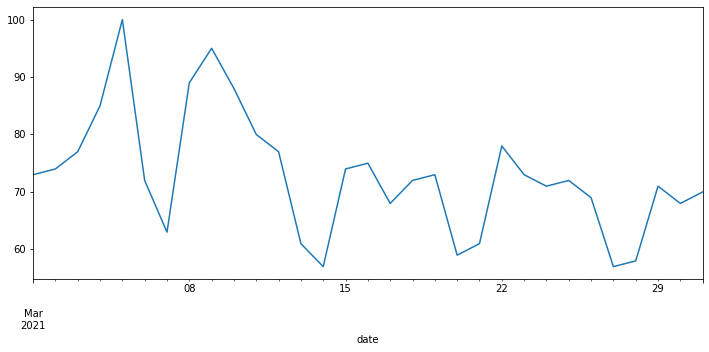

In [19]:
word = 'tesla'
get_trends(word)

In [14]:
from pytrends.request import TrendReq
import json
from pprint import pprint
pytrend = TrendReq(hl='en-US', tz=360)
keywords = ['tesla']
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe= timeframe_array,
     geo='US',
     gprop='')
df2 = pd.DataFrame(pytrend.interest_over_time())
# pprint(pytrend.interest_over_time())
# df2['tesla'].plot(figsize=(12,5))

# df2.index = pd.to_datetime(df2.index)
df2

,tesla,isPartial
date,,
2021-03-01,73,False
2021-03-02,74,False
2021-03-03,77,False
2021-03-04,85,False
2021-03-05,100,False
2021-03-06,72,False
2021-03-07,63,False
2021-03-08,89,False
2021-03-09,95,False


In [116]:
keyword_array = []
for i in stock_df.index:
    trends_df_filter = trends_df[trends_df.index==i]
    keyword_array.append(trends_df_filter['tesla'])
keyword_array

[date
 2021-03-01    73
 Name: tesla, dtype: int32,
 date
 2021-03-02    74
 Name: tesla, dtype: int32,
 date
 2021-03-03    77
 Name: tesla, dtype: int32,
 date
 2021-03-04    85
 Name: tesla, dtype: int32,
 date
 2021-03-05    100
 Name: tesla, dtype: int32,
 date
 2021-03-08    89
 Name: tesla, dtype: int32,
 date
 2021-03-09    95
 Name: tesla, dtype: int32,
 date
 2021-03-10    88
 Name: tesla, dtype: int32,
 date
 2021-03-11    80
 Name: tesla, dtype: int32,
 date
 2021-03-12    77
 Name: tesla, dtype: int32,
 date
 2021-03-15    74
 Name: tesla, dtype: int32,
 date
 2021-03-16    75
 Name: tesla, dtype: int32,
 date
 2021-03-17    68
 Name: tesla, dtype: int32,
 date
 2021-03-18    72
 Name: tesla, dtype: int32,
 date
 2021-03-19    73
 Name: tesla, dtype: int32,
 date
 2021-03-22    78
 Name: tesla, dtype: int32,
 date
 2021-03-23    73
 Name: tesla, dtype: int32,
 date
 2021-03-24    71
 Name: tesla, dtype: int32,
 date
 2021-03-25    72
 Name: tesla, dtype: int32,
 date
 2021

In [114]:
keyword_array = pd.DataFrame(keyword_array, index=['date'])
keyword_array

ValueError: Shape of passed values is (23, 23), indices imply (1, 23)

In [87]:
stock_df[str(keywords[0])] = keyword_array
stock_df

,open,low,volume,high,close,tesla
2021-03-01,690.109985,685.049988,27136200,719.000000,718.429993,73
2021-03-02,718.280029,685.000000,23732200,721.109985,686.440002,74
2021-03-03,687.989990,651.710022,30208000,700.700012,653.200012,77
2021-03-04,655.799988,600.000000,65919500,668.450012,621.440002,85
2021-03-05,626.059998,539.489990,89396500,627.840027,597.950012,100
2021-03-08,600.549988,558.789978,51787000,620.130005,563.000000,89
2021-03-09,608.179993,595.210022,67523300,678.090027,673.580017,95
2021-03-10,700.299988,655.059998,60605700,717.849976,668.059998,88
2021-03-11,699.400024,677.179993,36253900,702.500000,699.599976,80
2021-03-12,670.000000,666.140015,33583800,694.880005,693.729980,77


# PyTrend

### Interest By Region

In [ ]:
pytrend.build_payload(kw_list=[‘Taylor Swift’])
# Interest by Region
df = pytrend.interest_by_region()
df.reset_index().plot(x=’geoName’, y=’Taylor Swift’, figsize=(120, 10), kind =’bar’)

### Daily Search Trends

In [116]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='united_states')
df

,0
0,Real Madrid
1,Peloton
2,Josh Duggar
3,Real Madrid vs Chelsea
4,John Means
5,SpaceX
6,Suzanne Morphew
7,Elise Stefanik
8,Bruce Jenner
9,Chris Brown


### Top Charts - What was trending in year

In [120]:
# Get Google Top Charts
df = pytrend.top_charts(2020, hl='en-US', tz=360, geo='GLOBAL')
df

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


### Google Keyword Suggestions

In [125]:
# keywords = pytrend.suggestions(keyword='Mercedes Benz')
keywords = pytrend.suggestions(keyword='apple')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,Apple,Technology company
1,Apple,Topic
2,Apple,Fruit
3,Apples,Plant
4,iPhone,Mobile phone


### 相關搜索（熱門、人氣上升）

In [184]:
pytrend.build_payload(kw_list=['tesla'])
related_queries = pytrend.related_queries()
# related_queries.values()
test = related_queries.items()
test = list(test)[0][1]
top_kw = test['top']

In [185]:
top_kw.to_csv('top_kw.csv')

### 相關主題

In [112]:
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':     value formattedValue                                            link  \
0   89400       Breakout  /trends/explore?q=/g/11f9_gl16q&date=today+5-y   
1   21100       Breakout     /trends/explore?q=/m/0w2ztxm&date=today+5-y   
2   21000       Breakout  /trends/explore?q=/g/11dd_vrp41&date=today+5-y   
3   20050       Breakout  /trends/explore?q=/g/11f0_gfzs0&date=today+5-y   
4   11500       Breakout  /trends/explore?q=/g/11h60f7jd3&date=today+5-y   
5   10850       Breakout  /trends/explore?q=/g/11g1bplvvh&date=today+5-y   
6   10700       Breakout  /trends/explore?q=/g/11h0zhrnxw&date=today+5-y   
7    8600       Breakout  /trends/explore?q=/g/11h0zhrd3m&date=today+5-y   
8    6950       Breakout  /trends/explore?q=/g/11j0_kpvtp&date=today+5-y   
9    3750        +3,750%  /trends/explore?q=/g/11gb_4f22x&date=today+5-y   
10   3200        +3,200%  /trends/explore?q=/g/11f3w6nj92&date=today+5-y   
11   2150        +2,150%       /trends/explore?q=/m/07r04&date=t

In [ ]:
from pytrends.request import TrendReq
import json
import time
from pprint import pprint
page=''

while page=='':
    try:

        pytrends = TrendReq(hl='en-US', tz=298, timeout=(10,5), proxies=['https://34.203.233.13:80','https://35.201.123.31:880'], retries=2, backoff_factor=0.1, requests_args={'verify':False})
#         pytrend = TrendReq(hl='en-US', tz=360)
        keywords = ['apple']
        pytrend.build_payload(
             kw_list=keywords,
             cat=0,
             timeframe= timeframe_array,
             geo='',
             gprop='')
        df2 = pd.DataFrame(pytrend.interest_over_time())
        # pprint(pytrend.interest_over_time())
        # df['Python'].plot(figsize=(12,5))

        df2.index = pd.to_datetime(df2.index)
        df2
    except:
        print("Connection refused by the server..")
        print("Let me sleep for 5 seconds")
        print("ZZzzzz...")
        time.sleep(1)
        print("Was a nice sleep, now let me continue...")
        continue

In [ ]:
pytrend = TrendReq(hl='en-US', tz=360)
pytrend.build_payload(kw_list=['Donald Trump', 'Obama'], cat=0, timeframe='today 12-m', geo='US', gprop='')
pytrend.interest_over_time()
pytrend.interest_over_time().get('Obama')
preload = json.loads(pytrend.interest_over_time().to_json(orient='table'))['data']
pprint(json.dumps(preload, ensure_ascii=False))

In [72]:
import requests
import json
import numpy as np
import pandas as pd
import time
from datetime import datetime
URL = "https://query1.finance.yahoo.com/v8/finance/chart/"
stock = "TSLA"
# year = ''
# month = ''
# date = ''
period1 = str(int(datetime(2021, 3, 1).timestamp()+43200)) #台灣時間的美國股價
#在不指定時區的情況下， Python 會先將當地時間先轉回 UTC+0 的時間再取得 timestamp
period2 = str(int(datetime(2021, 5, 1).timestamp())+43200)

headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
               "AppleWebKit/537.36 (KHTML, like Gecko)"
               "Chrome/63.0.3239.132 Safari/537.36"}
response = requests.get(URL+stock+'?period1='+period1+"&period2="+period2+"&interval=1d&events=history&=hP2rOschxO0", headers=headers)

In [ ]:
print(response.text)

In [15]:
time_stamp = 1619726403 - 43200 # 設定timeStamp
struct_time = time.localtime(time_stamp) # 轉成時間元組
timeString = time.strftime("%Y-%m-%d %H:%M:%S", struct_time) # 轉成字串
print(timeString)

2021-04-29 16:00:03


In [73]:
data = json.loads(response.text)
a= np.array(data['chart']['result'][0]['timestamp'])
time_array = []
for i in a:
    struct_time = time.localtime(i) # 轉成時間元組
    timeString = time.strftime("%Y-%m-%d %H:%M:%S", struct_time) # 轉成字串
    np.array(time_array.append(timeString))
df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=time_array)
df

,volume,open,low,close,high
2021-03-01 22:30:00,27136200,690.109985,685.049988,718.429993,719.000000
2021-03-02 22:30:00,23732200,718.280029,685.000000,686.440002,721.109985
2021-03-03 22:30:00,30208000,687.989990,651.710022,653.200012,700.700012
2021-03-04 22:30:00,65919500,655.799988,600.000000,621.440002,668.450012
2021-03-05 22:30:00,89396500,626.059998,539.489990,597.950012,627.840027
2021-03-08 22:30:00,51787000,600.549988,558.789978,563.000000,620.130005
2021-03-09 22:30:00,67523300,608.179993,595.210022,673.580017,678.090027
2021-03-10 22:30:00,60605700,700.299988,655.059998,668.059998,717.849976
2021-03-11 22:30:00,36253900,699.400024,677.179993,699.599976,702.500000
2021-03-12 22:30:00,33583800,670.000000,666.140015,693.729980,694.880005


In [67]:
i

1618867800

In [ ]:
a= np.array(data['chart']['result'][0]['timestamp'])
time_array = []
for i in a:
    time_stamp = i # 設定timeStamp
    struct_time = time.localtime(time_stamp) # 轉成時間元組
    timeString = time.strftime("%Y-%m-%d %H:%M:%S", struct_time) # 轉成字串
    np.array(time_array.append(timeString))
len(time_array)

In [ ]:
df.close.plot(figsize=(12,5))